Cab booking system is the process where renting a cab is automated through an app throughout a city. Using this app, people can book a cab from one location to another location. Being a cab booking app company, exploiting the understanding of cab supply and demand could increase the efficiency of their service and enhance user experience by minimizing waiting time.
Objective of this project is to combine historical usage pattern along with the open data sources like weather data to forecast cab booking demand in a city.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
x_train= pd.read_csv("C:/Users/91758/Downloads/o3j4hrcekn/Dataset/train.csv")

In [3]:
y_train=pd.read_csv("C:/Users/91758/Downloads/o3j4hrcekn/Dataset/train_label.csv",header=None,names= ['Total_booking'])

In [4]:
x_test= pd.read_csv("C:/Users/91758/Downloads/o3j4hrcekn/Dataset/test.csv")

In [5]:
y_test=pd.read_csv("C:/Users/91758/Downloads/o3j4hrcekn/Dataset/test_label.csv",header=None,names= ['Total_booking'])

In [6]:
x_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [7]:
x_train.weather.unique()

array([' Clear + Few clouds', ' Light Snow, Light Rain',
       ' Mist + Cloudy ', ' Heavy Rain + Thunderstorm '], dtype=object)

In [8]:
y_train.head()

,Total_booking
0,504
1,5
2,139
3,209
4,184


In [9]:
y_train.shape

(8708, 1)

##### 1. Visualize data using different visualizations to generate interesting insights.

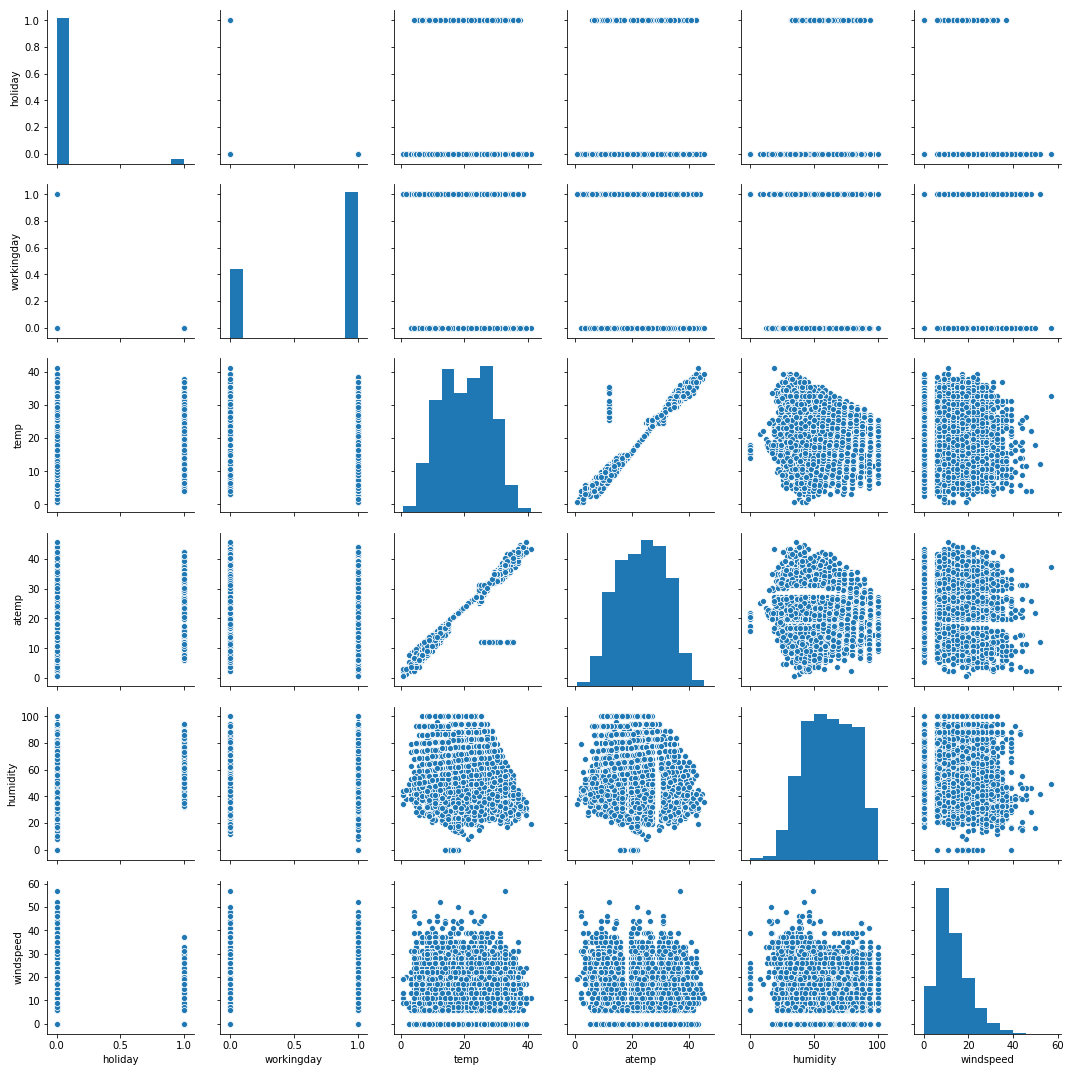

In [10]:
sns.pairplot(x_train)

##### 2. Outlier Analysis

In [11]:
x_train= pd.concat([x_train,y_train],axis=1)

In [12]:
x_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [13]:
upper_lim = x_train['atemp'].quantile(.75)
lower_lim = x_train['atemp'].quantile(.25)
IQR = upper_lim - lower_lim
x_train= x_train[~((x_train['atemp'] < (lower_lim - 1.5 * IQR)) |(x_train['atemp']> (upper_lim + 1.5 * IQR)))]

In [14]:
upper_lim =  x_train['humidity'].quantile(.75)
lower_lim = x_train['humidity'].quantile(.25)
IQR = upper_lim - lower_lim
x_train= x_train[~((x_train['humidity'] < (lower_lim - 1.5 * IQR)) |(x_train['humidity']> (upper_lim + 1.5 * IQR)))]

In [15]:
upper_lim = x_train['windspeed'].quantile(.75)
lower_lim = x_train['windspeed'].quantile(.25)
IQR = upper_lim - lower_lim
x_train= x_train[~((x_train['windspeed'] < (lower_lim - 1.5 * IQR)) |(x_train['windspeed']> (upper_lim + 1.5 * IQR)))]

In [16]:
x_train.season.unique()

array(['Summer', 'Fall', 'Spring', 'Winter'], dtype=object)

In [17]:
x_train.weather.unique()

array([' Clear + Few clouds', ' Light Snow, Light Rain',
       ' Mist + Cloudy ', ' Heavy Rain + Thunderstorm '], dtype=object)

In [18]:
x_train.shape

(8526, 10)

##### 3. Missing value analysis

In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8526 entries, 0 to 8707
Data columns (total 10 columns):
datetime         8526 non-null object
season           8526 non-null object
holiday          8526 non-null int64
workingday       8526 non-null int64
weather          8526 non-null object
temp             8526 non-null float64
atemp            8526 non-null float64
humidity         8526 non-null int64
windspeed        8526 non-null float64
Total_booking    8526 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 732.7+ KB


In [20]:
x_train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

##### 4. Visualizing Total_booking Vs other features to generate insights

In [21]:
x_train['datetime']=pd.to_datetime(x_train['datetime'])

In [22]:
def hr_func(ts):
    return ts.hour

x_train['new_time'] = x_train['datetime'].apply(hr_func)

In [23]:
x_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,new_time
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,19
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,4
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,9
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,16
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,13


In [24]:
x_train.shape

(8526, 11)

In [25]:
x_train.drop('datetime',axis=1,inplace=True)

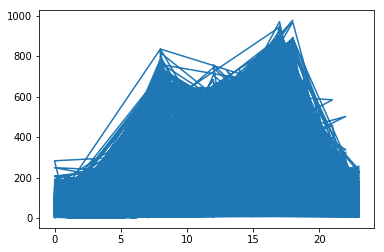

In [26]:
plt.plot(x_train['new_time'],x_train['Total_booking'])
plt.show()

<BarContainer object of 8526 artists>

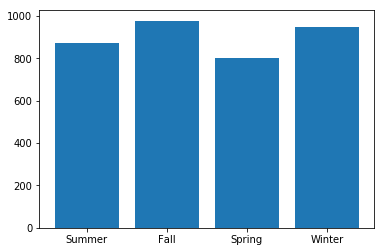

In [27]:
plt.bar(x_train['season'],x_train['Total_booking'])

<BarContainer object of 8526 artists>

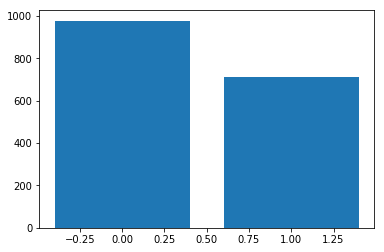

In [28]:
plt.bar(x_train['holiday'],x_train['Total_booking'])

<BarContainer object of 8526 artists>

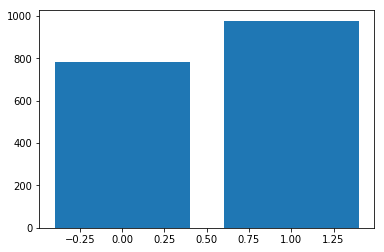

In [29]:
plt.bar(x_train['workingday'],x_train['Total_booking'])

<BarContainer object of 8526 artists>

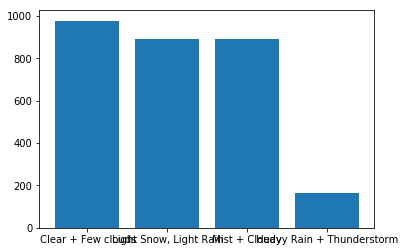

In [30]:
plt.bar(x_train['weather'],x_train['Total_booking'])

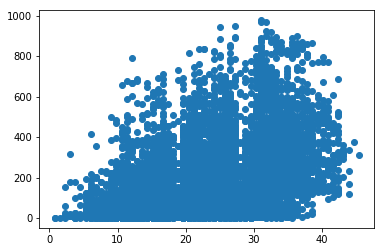

In [31]:
plt.scatter(x_train['atemp'],x_train['Total_booking'])

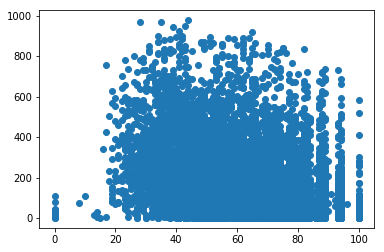

In [32]:
plt.scatter(x_train['humidity'],x_train['Total_booking'])

<BarContainer object of 8526 artists>

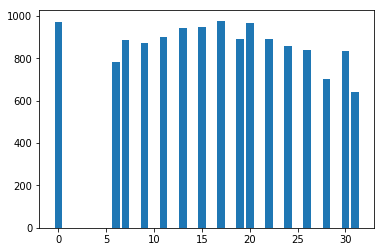

In [33]:
plt.bar(x_train['windspeed'],x_train['Total_booking'])

##### 5. Correlation Analysis

In [34]:
x_train.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,new_time
holiday,1.000000,-0.249839,0.001190,-0.004163,-0.004272,0.010236,-0.004728,0.004637
workingday,-0.249839,1.000000,0.028982,0.022678,-0.012050,0.015799,0.011299,0.002779
temp,0.001190,0.028982,1.000000,0.984131,-0.074168,-0.010232,0.394338,0.149411
atemp,-0.004163,0.022678,0.984131,1.000000,-0.053346,-0.049286,0.389535,0.145401
humidity,-0.004272,-0.012050,-0.074168,-0.053346,1.000000,-0.301306,-0.314783,-0.272052
windspeed,0.010236,0.015799,-0.010232,-0.049286,-0.301306,1.000000,0.104158,0.128090
Total_booking,-0.004728,0.011299,0.394338,0.389535,-0.314783,0.104158,1.000000,0.403229
new_time,0.004637,0.002779,0.149411,0.145401,-0.272052,0.128090,0.403229,1.000000


In [35]:
from scipy.stats import pearsonr

In [36]:
pearsonr(x_train['atemp'],x_train['Total_booking'])

(0.3895352025482977, 5.513122420594303e-307)

temp and atemp are highly correlated variables so we can remove any one of them.

In [37]:
x_train.drop('temp',axis=1,inplace=True)

##### 2.1. Feature Engineering

In [38]:
x_train['season']= x_train['season'].replace({'Summer':0, 'Fall':1, 'Spring':2, 'Winter':3})

In [39]:
x_train['weather']=  x_train['weather'].replace({' Clear + Few clouds':0, ' Light Snow, Light Rain':1,' Mist + Cloudy ':2, ' Heavy Rain + Thunderstorm ':3})

In [40]:
x_train.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,Total_booking,new_time
0,0,0,1,0,25.760,77,16.9979,504,19
1,1,0,1,0,33.335,79,19.0012,5,4
2,2,0,1,0,6.060,50,22.0028,139,9
3,3,0,1,0,16.665,29,8.9981,209,16
4,1,0,1,0,33.335,51,19.0012,184,13


In [41]:
x_train.season.unique()

array([0, 1, 2, 3], dtype=int64)

In [42]:
y_train= x_train['Total_booking']

In [43]:
x= x_train[['season','holiday','workingday','weather','atemp','humidity','windspeed','new_time']]

In [44]:
x.shape

(8526, 8)

##### 2.2. Grid search



In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [46]:
parameters = {}

In [47]:
model= LinearRegression()

In [48]:
grid = GridSearchCV(model,parameters, cv=5,verbose=5,scoring='neg_mean_absolute_error')

##### 2.3. Regression Analysis

In [49]:
grid.fit(x,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ...................... , score=-110.06478005005717, total=   0.0s
[CV]  ................................................................
[CV] ...................... , score=-113.11157828802291, total=   0.0s
[CV]  ................................................................
[CV] ...................... , score=-108.01296326612703, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s



[CV]  ................................................................
[CV] ...................... , score=-109.19201035150456, total=   0.0s
[CV]  ................................................................
[CV] ...................... , score=-107.60360829469502, total=   0.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=5)

In [50]:
lr_score=grid.cv_results_
lr_score

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

{'mean_fit_time': array([0.0343554]),
 'std_fit_time': array([0.05473354]),
 'mean_score_time': array([0.00399957]),
 'std_score_time': array([9.95665217e-07]),
 'params': [{}],
 'split0_test_score': array([-110.06478005]),
 'split1_test_score': array([-113.11157829]),
 'split2_test_score': array([-108.01296327]),
 'split3_test_score': array([-109.19201035]),
 'split4_test_score': array([-107.60360829]),
 'mean_test_score': array([-109.59704292]),
 'std_test_score': array([1.96039549]),
 'rank_test_score': array([1]),
 'split0_train_score': array([-108.97789611]),
 'split1_train_score': array([-108.2472645]),
 'split2_train_score': array([-110.0123218]),
 'split3_train_score': array([-109.74091581]),
 'split4_train_score': array([-109.97889231]),
 'mean_train_score': array([-109.39145811]),
 'std_train_score': array([0.68306426])}

In [51]:
print(grid.best_params_)
print('Testing score',lr_score['mean_test_score'])
print('Training score',lr_score['mean_train_score'])
print(lr_score['split1_test_score'])
print(lr_score['params'])

{}
Testing score [-109.59704292]
Training score [-109.39145811]
[-113.11157829]
[{}]


##### 2.4. Ensemble Model

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, interaction_only=True)
output_nparray = poly.fit_transform(x)

In [53]:
grid.fit(output_nparray,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ....................... , score=-104.1056520079784, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=-108.0384203218407, total=   0.0s
[CV]  ................................................................
[CV] ...................... , score=-105.35874506799144, total=   0.0s
[CV]  ................................................................
[CV] ...................... , score=-105.00719711196169, total=   0.0s
[CV]  ................................................................
[CV] ...................... , score=-103.05415326776753, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=5)

In [54]:
lr_score=grid.cv_results_
lr_score

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

{'mean_fit_time': array([0.01599402]),
 'std_fit_time': array([0.00713872]),
 'mean_score_time': array([0.]),
 'std_score_time': array([0.]),
 'params': [{}],
 'split0_test_score': array([-104.10565201]),
 'split1_test_score': array([-108.03842032]),
 'split2_test_score': array([-105.35874507]),
 'split3_test_score': array([-105.00719711]),
 'split4_test_score': array([-103.05415327]),
 'mean_test_score': array([-105.11271542]),
 'std_test_score': array([1.66626739]),
 'rank_test_score': array([1]),
 'split0_train_score': array([-104.40823993]),
 'split1_train_score': array([-103.69283235]),
 'split2_train_score': array([-104.63093581]),
 'split3_train_score': array([-104.71911224]),
 'split4_train_score': array([-104.94173738]),
 'mean_train_score': array([-104.47857154]),
 'std_train_score': array([0.42846935])}

In [55]:
from sklearn.linear_model import Lasso,Ridge

In [56]:
la=Lasso()

In [57]:
l_params={'alpha':[0.001,0.01,0.1]}
grid = GridSearchCV(la,l_params, cv=5,verbose=5,scoring='neg_mean_absolute_error')
grid.fit(x,y_train)
lr_score1=grid.cv_results_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] alpha=0.001 .....................................................
[CV] ........... alpha=0.001, score=-110.06478114780072, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ........... alpha=0.001, score=-113.11179000754755, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ........... alpha=0.001, score=-108.01281873608224, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ........... alpha=0.001, score=-109.19221221296169, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ............ alpha=0.001, score=-107.6040312836017, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............ alpha=0.01, score=-110.06479131626584, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=0.1 .......................................................
[CV] ............. alpha=0.1, score=-109.20423802580454, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ............. alpha=0.1, score=-107.61309303285827, total=   0.0s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


In [58]:
print(grid.best_params_)
print('Testing score',lr_score1['mean_test_score'])
print('Training score',lr_score1['mean_train_score'])
print(lr_score1['split1_test_score'])
print(lr_score1['params'])

{'alpha': 0.001}
Testing score [-109.59718153 -109.59832268 -109.60304729]
Training score [-109.39160218 -109.3928605  -109.40185239]
[-113.11179001 -113.11369549 -113.13326334]
[{'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}]


C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [59]:
r= Ridge()
r_params={'alpha':[0,0.5,1]}
grid = GridSearchCV(r,r_params, cv=5,verbose=5,scoring='neg_mean_absolute_error')
grid.fit(x,y_train)
lr_score2=grid.cv_results_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] alpha=0 .........................................................
[CV] ............... alpha=0, score=-110.06478005005715, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=0 .........................................................
[CV] ............... alpha=0, score=-113.11157828802291, total=   0.0s
[CV] alpha=0 .........................................................
[CV] ............... alpha=0, score=-108.01296326612703, total=   0.0s
[CV] alpha=0 .........................................................
[CV] ............... alpha=0, score=-109.19201035150456, total=   0.0s
[CV] alpha=0 .........................................................
[CV] ............... alpha=0, score=-107.60360829469502, total=   0.0s
[CV] alpha=0.5 .......................................................
[CV] ............. alpha=0.5, score=-110.06470477065604, total=   0.0s
[CV] alpha=0.5 .......................................................
[CV] ............. alpha=0.5, score=-113.11160796584788, total=   0.0s
[CV] alpha=0.5 .......................................................
[CV] ............. alpha=0.5, score=-108.01270244813236, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


In [60]:
print(grid.best_params_)
print('Testing score',lr_score2['mean_test_score'])
print('Training score',lr_score2['mean_train_score'])
print(lr_score2['split1_test_score'])
print(lr_score2['params'])

{'alpha': 1}
Testing score [-109.59704292 -109.5970082  -109.59697357]
Training score [-109.39145811 -109.39148004 -109.39150186]
[-113.11157829 -113.11160797 -113.11163715]
[{'alpha': 0}, {'alpha': 0.5}, {'alpha': 1}]


C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
x= x_train[['new_time']]

In [63]:
lr = RandomForestRegressor(n_estimators=50)
lr.fit(x, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [64]:
print("Training set score: {:.2f}".format(lr.score(x, y_train)))

Training set score: 0.52


In [65]:
x_test['datetime']=pd.to_datetime(x_test['datetime'])

In [66]:
x_test['new_time'] = x_test['datetime'].apply(hr_func)

In [67]:
x=x_test[['new_time']]

In [68]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 10 columns):
datetime      2178 non-null datetime64[ns]
season        2178 non-null object
holiday       2178 non-null int64
workingday    2178 non-null int64
weather       2178 non-null object
temp          2178 non-null float64
atemp         2178 non-null float64
humidity      2178 non-null int64
windspeed     2178 non-null float64
new_time      2178 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 170.2+ KB


In [69]:
pred= lr.predict(x)

In [70]:
print("Test set score: {:.2f}".format(lr.score(x, y_test)))

Test set score: 0.51


In [71]:
from sklearn.metrics import r2_score
print(r2_score(pred,y_test))

0.11803787865042215


In [72]:
x= x_train[['season','holiday','workingday','weather','atemp','humidity','windspeed','new_time']]

In [73]:
lr.fit(x,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [74]:
x_test=x_test[['season','holiday','workingday','weather','atemp','humidity','windspeed','new_time']]

In [75]:
x_test['season']= x_test['season'].replace({'Summer':0, 'Fall':1, 'Spring':2, 'Winter':3})
x_test['weather']=  x_test['weather'].replace({' Clear + Few clouds':0, ' Light Snow, Light Rain':1,' Mist + Cloudy ':2, ' Heavy Rain + Thunderstorm ':3})

In [76]:
pred1= lr.predict(x_test)

In [77]:
print(r2_score(pred1,y_test))

0.8237302305937982
